In [ ]:
from google.colab import drive
drive.mount('/content/drive')

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import RepeatedStratifiedKFold

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn
import math

data=pd.read_csv("/content/drive/MyDrive/horse.csv")

data=data.drop('hospital_number', axis=1)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<ipython-input-35-80828703432b>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sbn.heatmap(data[features].corr(), vmin=-1, vmax=1, center=0)


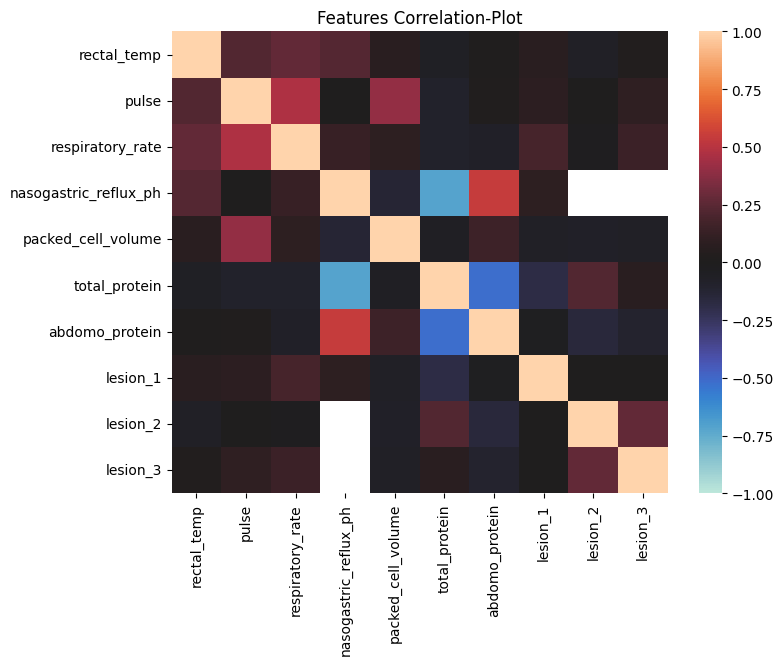

In [ ]:
features = data.columns
plt.figure(figsize=[8,6])
plt.title('Features Correlation-Plot')
sbn.heatmap(data[features].corr(), vmin=-1, vmax=1, center=0)
plt.show()

<Axes: xlabel='outcome', ylabel='count'>

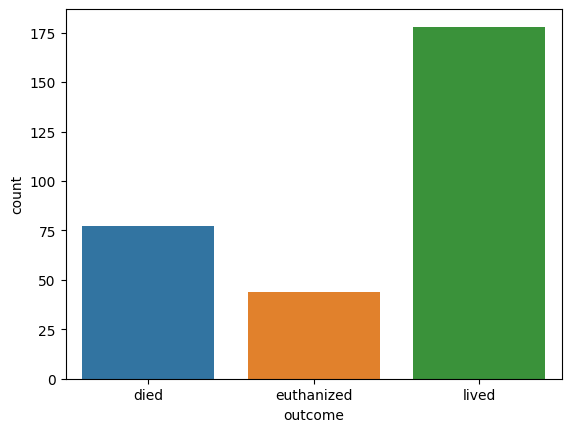

In [ ]:
sbn.countplot(x='outcome', data=data)

In [ ]:
print(data.iloc[:, 9:15].notnull().sum())
data=data.drop('nasogastric_reflux_ph', axis=1)

pain                     244
peristalsis              255
abdominal_distention     243
nasogastric_tube         195
nasogastric_reflux       193
nasogastric_reflux_ph     53
dtype: int64


<Axes: xlabel='pain', ylabel='count'>

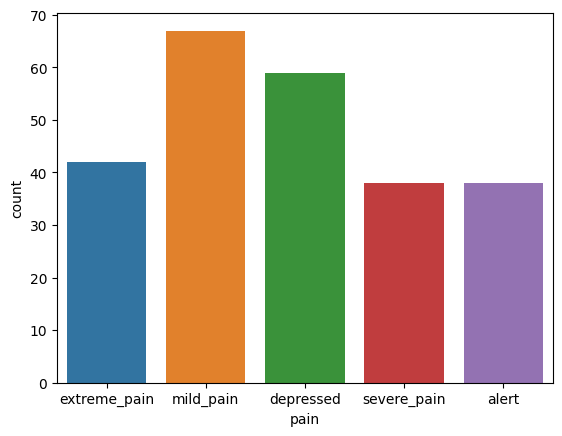

In [ ]:
sbn.countplot(x='pain', data=data)

In [ ]:
row,col=data.shape

ce, cm, cd, cs, ca=0,0,0,0,0

for i in range(row):
  if data['surgery'][i]=='yes':
    if data['pain'][i]=='extreme_pain':
      ce+=1
    if data['pain'][i]=='mild_pain':
      cm+=1
    if data['pain'][i]=='depressed':
      cd+=1
    if data['pain'][i]=='severe_pain':
      cs+=1
    if data['pain'][i]=='alert':
      ca+=1

print(ce, cm, cd, cs, ca)

ce, cm, cd, cs, ca=0,0,0,0,0

for i in range(row):
  if data['surgery'][i]=='no':
    if data['pain'][i]=='extreme_pain':
      ce+=1
    if data['pain'][i]=='mild_pain':
      cm+=1
    if data['pain'][i]=='depressed':
      cd+=1
    if data['pain'][i]=='severe_pain':
      cs+=1
    if data['pain'][i]=='alert':
      ca+=1

print(ce, cm, cd, cs, ca)


for index, value in enumerate(data['pain']):
    if pd.isnull(value):
      if data['surgery'][index]=='yes':
        data['pain'][index]='mild_pain'
      if data['surgery'][index]=='no':
        data['pain'][index]='alert'


for i in range(row):
  if data['pain'][i]=='extreme_pain':
    data['pain'][i]=5
  if data['pain'][i]=='mild_pain':
    data['pain'][i]=3
  if data['pain'][i]=='depressed':
    data['pain'][i]=2
  if data['pain'][i]=='severe_pain':
    data['pain'][i]=4
  if data['pain'][i]=='alert':
    data['pain'][i]=1

33 39 34 28 9
9 28 25 10 29


<ipython-input-39-8db9bccdbc2f>:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['pain'][index]='alert'
<ipython-input-39-8db9bccdbc2f>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['pain'][index]='mild_pain'
<ipython-input-39-8db9bccdbc2f>:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['pain'][i]=5
<ipython-input-39-8db9bccdbc2f>:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from 

<Axes: xlabel='peristalsis', ylabel='count'>

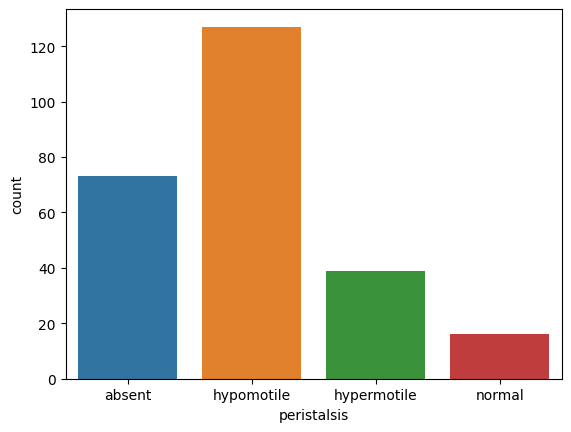

In [ ]:
sbn.countplot(x='peristalsis', data=data)

In [ ]:
data['peristalsis']=data['peristalsis'].fillna('hypomotile')

for i in range(row):
  if data['peristalsis'][i]=='absent':
    data['peristalsis'][i]=1
  if data['peristalsis'][i]=='hypomotile':
    data['peristalsis'][i]=3
  if data['peristalsis'][i]=='hypermotile':
    data['peristalsis'][i]=4
  if data['peristalsis'][i]=='normal':
    data['peristalsis'][i]=2

<ipython-input-41-91665291b167>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['peristalsis'][i]=1
<ipython-input-41-91665291b167>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['peristalsis'][i]=3
<ipython-input-41-91665291b167>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['peristalsis'][i]=4
<ipython-input-41-91665291b167>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Data

27 31 34 50
11 34 41 15


<ipython-input-42-fdc46d12e568>:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['abdominal_distention'][index]='none'
<ipython-input-42-fdc46d12e568>:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['abdominal_distention'][index]='moderate'
<ipython-input-42-fdc46d12e568>:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['abdominal_distention'][i]=4
<ipython-input-42-fdc46d12e568>:45: SettingWithCopyWarning: 
A value 

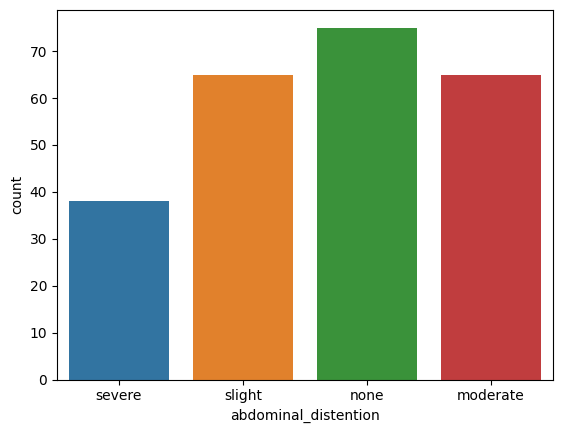

In [ ]:
sbn.countplot(x='abdominal_distention', data=data)

ca, ch, chy, cn=0,0,0,0

for i in range(row):
  if data['surgery'][i]=='yes':
    if data['abdominal_distention'][i]=='severe':
      ca+=1
    if data['abdominal_distention'][i]=='slight':
      ch+=1
    if data['abdominal_distention'][i]=='none':
      chy+=1
    if data['abdominal_distention'][i]=='moderate':
      cn+=1


print(ca, ch, chy, cn)

ca, ch, chy, cn=0,0,0,0

for i in range(row):
  if data['surgery'][i]=='no':
    if data['abdominal_distention'][i]=='severe':
      ca+=1
    if data['abdominal_distention'][i]=='slight':
      ch+=1
    if data['abdominal_distention'][i]=='none':
      chy+=1
    if data['abdominal_distention'][i]=='moderate':
      cn+=1

print(ca, ch, chy, cn)

for index, value in enumerate(data['abdominal_distention']):
    if pd.isnull(value):
      if data['surgery'][index]=='yes':
        data['abdominal_distention'][index]='moderate'
      if data['surgery'][index]=='no':
        data['abdominal_distention'][index]='none'

for i in range(row):
  if data['abdominal_distention'][i]=='severe':
    data['abdominal_distention'][i]=4
  if data['abdominal_distention'][i]=='slight':
    data['abdominal_distention'][i]=2
  if data['abdominal_distention'][i]=='none':
    data['abdominal_distention'][i]=1
  if data['abdominal_distention'][i]=='moderate':
    data['abdominal_distention'][i]=3

<ipython-input-43-47df329a4cdb>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['nasogastric_tube'][i]=2
<ipython-input-43-47df329a4cdb>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['nasogastric_tube'][i]=1
<ipython-input-43-47df329a4cdb>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['nasogastric_tube'][i]=3


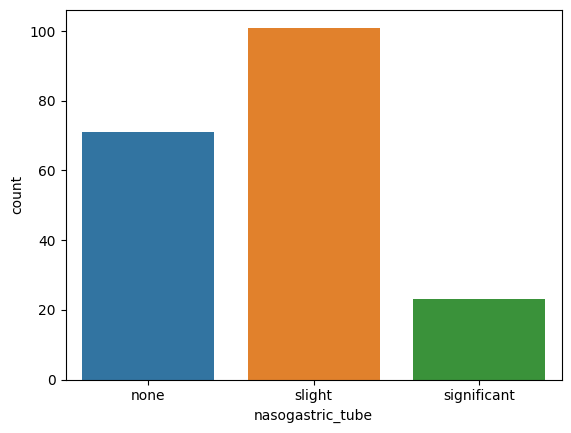

In [ ]:
sbn.countplot(x='nasogastric_tube', data=data)
data['nasogastric_tube']=data['nasogastric_tube'].fillna('slight')
for i in range(row):
  if data['nasogastric_tube'][i]=='none':
    data['nasogastric_tube'][i]=1
  if data['nasogastric_tube'][i]=='slight':
    data['nasogastric_tube'][i]=2
  if data['nasogastric_tube'][i]=='significant':
    data['nasogastric_tube'][i]=3

<ipython-input-44-70980d126a34>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['nasogastric_reflux'][i]=1
<ipython-input-44-70980d126a34>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['nasogastric_reflux'][i]=2
<ipython-input-44-70980d126a34>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['nasogastric_reflux'][i]=3


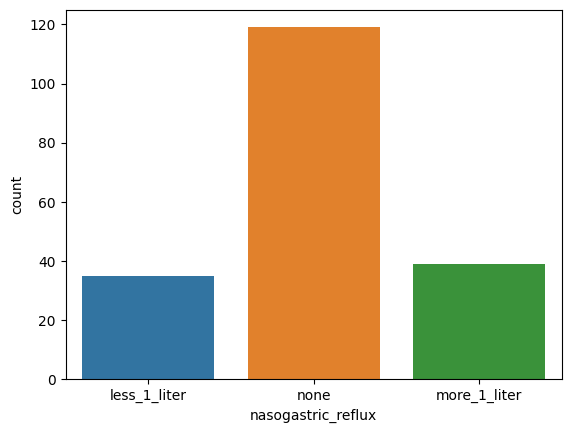

In [ ]:
sbn.countplot(x='nasogastric_reflux', data=data)
data['nasogastric_reflux']=data['nasogastric_reflux'].fillna('none')
for i in range(row):
  if data['nasogastric_reflux'][i]=='none':
    data['nasogastric_reflux'][i]=1
  if data['nasogastric_reflux'][i]=='less_1_liter':
    data['nasogastric_reflux'][i]=2
  if data['nasogastric_reflux'][i]=='more_1_liter':
    data['nasogastric_reflux'][i]=3

<Axes: >

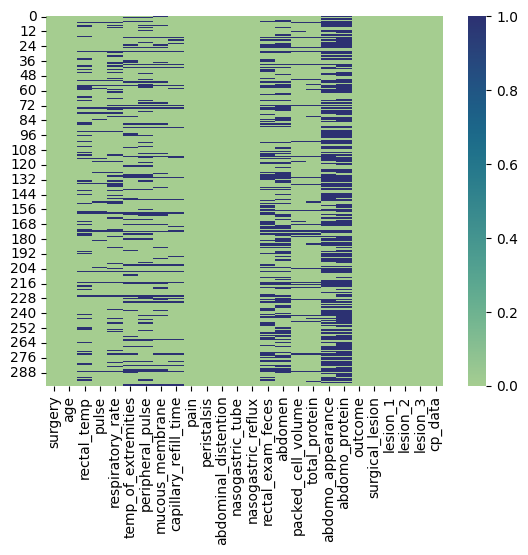

In [ ]:
sbn.heatmap(data.isnull(), cmap = 'crest')

25 8 27 59
32 5 21 20


<ipython-input-46-7d2dd90404b0>:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['rectal_exam_feces'][index]='normal'
<ipython-input-46-7d2dd90404b0>:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['rectal_exam_feces'][index]='absent'
<ipython-input-46-7d2dd90404b0>:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['rectal_exam_feces'][i]=3
<ipython-input-46-7d2dd90404b0>:55: SettingWithCopyWarning: 
A value is trying

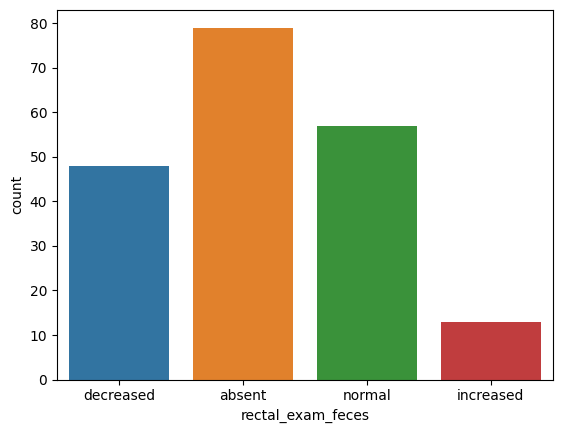

In [ ]:
data=data.drop(['abdomo_appearance', 'abdomo_protein'], axis=1)
sbn.countplot(x='rectal_exam_feces', data=data)

c_normal=0
c_increased=0
c_decreased=0
c_absent=0

for r in range(row):
  if data['surgery'][r]=='yes':
    if data['rectal_exam_feces'][r]=='normal':
      c_normal+=1
    if data['rectal_exam_feces'][r]=='increased':
      c_increased+=1
    if data['rectal_exam_feces'][r]=='decreased':
      c_decreased+=1
    if data['rectal_exam_feces'][r]=='absent':
      c_absent+=1

print(c_normal, c_increased, c_decreased, c_absent)

c_normal=0
c_increased=0
c_decreased=0
c_absent=0

for r in range(row):
  if data['surgery'][r]=='no':
    if data['rectal_exam_feces'][r]=='normal':
      c_normal+=1
    if data['rectal_exam_feces'][r]=='increased':
      c_increased+=1
    if data['rectal_exam_feces'][r]=='decreased':
      c_decreased+=1
    if data['rectal_exam_feces'][r]=='absent':
      c_absent+=1

print( c_normal, c_increased, c_decreased, c_absent)

for index, value in enumerate(data['rectal_exam_feces']):
    if pd.isnull(value):
      if data['surgery'][index]=='yes':
        data['rectal_exam_feces'][index]='absent'
      if data['surgery'][index]=='no':
        data['rectal_exam_feces'][index]='normal'

for i in range(row):
  if data['rectal_exam_feces'][i]=='normal':
    data['rectal_exam_feces'][i]=1
  if data['rectal_exam_feces'][i]=='increased':
    data['rectal_exam_feces'][i]=2
  if data['rectal_exam_feces'][i]=='decreased':
    data['rectal_exam_feces'][i]=3
  if data['rectal_exam_feces'][i]=='absent':
    data['rectal_exam_feces'][i]=4




<ipython-input-47-b685047327db>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['abdomen'][r]=5
<ipython-input-47-b685047327db>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['abdomen'][r]=2
<ipython-input-47-b685047327db>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['abdomen'][r]=1
<ipython-input-47-b685047327db>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See 

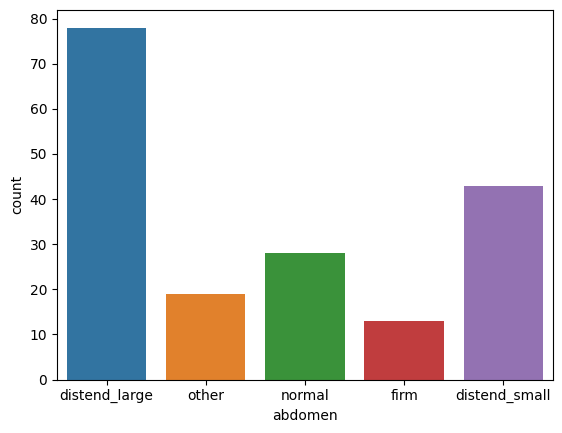

In [ ]:
sbn.countplot(x='abdomen', data=data)

data['abdomen']=data['abdomen'].fillna('distend_large')

for r in range(row):
  if data['abdomen'][r]=='normal':
    data['abdomen'][r]=1
  if data['abdomen'][r]=='other':
    data['abdomen'][r]=2
  if data['abdomen'][r]=='firm':
    data['abdomen'][r]=3
  if data['abdomen'][r]=='distend_small':
    data['abdomen'][r]=4
  if data['abdomen'][r]=='distend_large':
    data['abdomen'][r]=5

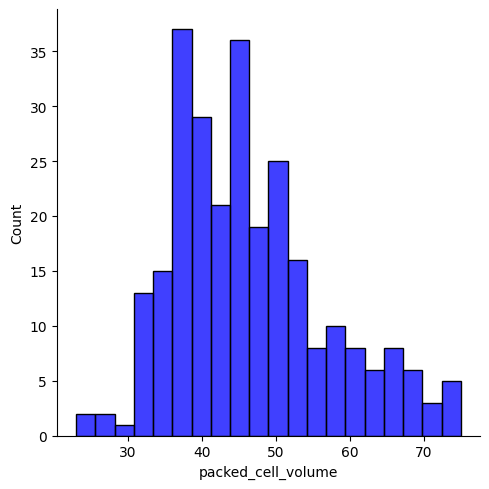

In [ ]:
sbn.displot(data['packed_cell_volume'].dropna(), kind = 'hist', color = 'blue', bins = 20)
mean=data['packed_cell_volume'].mean()//1
data['packed_cell_volume']=data['packed_cell_volume'].fillna(mean)

col=data['packed_cell_volume'].values.reshape(-1,1)
min=1
max=6
scale=MinMaxScaler(feature_range=(min, max))
scaled_col=scale.fit_transform(col)
data['packed_cell_volume']=scaled_col

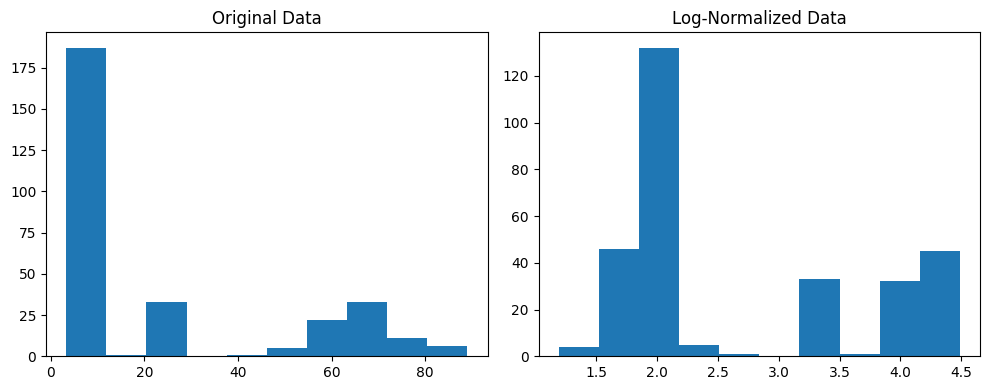

In [ ]:
mean=data['total_protein'].mean()
data['total_protein']=data['total_protein'].fillna(mean)

plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.hist(data['total_protein'], bins=10)
plt.title('Original Data')

data['total_protein'] = np.log(data['total_protein'])

plt.subplot(1, 2, 2)
plt.hist(data['total_protein'], bins=10)
plt.title('Log-Normalized Data')

plt.tight_layout()
plt.show()

In [ ]:
df = data.copy(deep=True)
df.drop(df.iloc[:, 9:18],axis=1, inplace=True)
target = 'outcome'
labels = ['died', 'euthanized', 'lived']
features = [i for i in df.columns.values if i not in [target]]
display(df.head(8))

,surgery,age,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,outcome,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data
0,no,adult,38.5,66.0,28.0,cool,reduced,NaN,more_3_sec,died,no,11300,0,0,no
1,yes,adult,39.2,88.0,20.0,NaN,NaN,pale_cyanotic,less_3_sec,euthanized,no,2208,0,0,no
2,no,adult,38.3,40.0,24.0,normal,normal,pale_pink,less_3_sec,lived,no,0,0,0,yes
3,yes,young,39.1,164.0,84.0,cold,normal,dark_cyanotic,more_3_sec,died,yes,2208,0,0,yes
4,no,adult,37.3,104.0,35.0,NaN,NaN,dark_cyanotic,more_3_sec,died,no,4300,0,0,no
5,no,adult,NaN,NaN,NaN,warm,normal,pale_pink,less_3_sec,lived,no,0,0,0,no
6,yes,adult,37.9,48.0,16.0,normal,normal,normal_pink,less_3_sec,lived,yes,3124,0,0,no
7,yes,adult,NaN,60.0,NaN,cool,NaN,NaN,less_3_sec,died,yes,2208,0,0,no


In [ ]:
nu = df[features].nunique().sort_values()
print(nu)

nf = []; cf = []; nnf = 0; ncf = 0;

for i in range(df[features].shape[1]):
    if nu.values[i]<=7:cf.append(nu.index[i])
    else: nf.append(nu.index[i])

surgery                   2
age                       2
surgical_lesion           2
lesion_3                  2
cp_data                   2
capillary_refill_time     3
temp_of_extremities       4
peripheral_pulse          4
mucous_membrane           6
lesion_2                  6
rectal_temp              40
respiratory_rate         40
pulse                    52
lesion_1                 61
dtype: int64


In [ ]:
nvc = pd.DataFrame(df.isnull().sum().sort_values(), columns=['Total Null Values'])
nvc['Percentage'] = round(nvc['Total Null Values']/df.shape[0],3)*100
print(nvc)

                       Total Null Values  Percentage
surgery                                0         0.0
age                                    0         0.0
outcome                                0         0.0
surgical_lesion                        0         0.0
lesion_1                               0         0.0
lesion_2                               0         0.0
lesion_3                               0         0.0
cp_data                                0         0.0
pulse                                 24         8.0
capillary_refill_time                 32        10.7
mucous_membrane                       47        15.7
temp_of_extremities                   56        18.7
respiratory_rate                      58        19.4
rectal_temp                           60        20.1
peripheral_pulse                      69        23.1


In [ ]:
ecc = nvc[nvc['Percentage']!=0].index.values
dcc = [i for i in df.columns if i not in ecc]

In [ ]:
MAP={}
for i,e in enumerate(df['outcome'].unique()):
    MAP[e]=i
df['outcome']=df['outcome'].map(MAP)

df2 = df[dcc]
fcc = [i for i in cf if i not in ecc]

#One-Hot Binary Encoding
for i in fcc:
    if df2[i].nunique()==2:
      df2[i]=pd.get_dummies(df2[i], drop_first=True, prefix=str(i))
    if (df2[i].nunique()>2 and df2[i].nunique()<17):
      df2 = pd.concat([df2.drop([i], axis=1), pd.DataFrame(pd.get_dummies(df2[i], drop_first=True, prefix=str(i)))],axis=1)

<ipython-input-54-0f533a73a22f>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[i]=pd.get_dummies(df2[i], drop_first=True, prefix=str(i))
<ipython-input-54-0f533a73a22f>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[i]=pd.get_dummies(df2[i], drop_first=True, prefix=str(i))
<ipython-input-54-0f533a73a22f>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: h

In [ ]:
for x in [i for i in ecc if i in cf]:
    a = df[x]
    b=[]; c=[]

    for i,e in enumerate(a):
        if e!=e:
            b.append(i)
        else:
            c.append(i)

    RF = RandomForestClassifier()
    RF.fit(df2.loc[c],a[c])
    d = RF.predict(df2.loc[b])

    df2[x] = a
    f=0
    for i,e in enumerate(df2[x]):
        if e!=e:
            df2.loc[i,x] = d[f]
            f+=1
    df2 = pd.concat([df2.drop([x], axis=1), pd.DataFrame(pd.get_dummies(df2[x], drop_first=True, prefix=str(x)))],axis=1)

In [ ]:
from sklearn.linear_model import LinearRegression
for x in [i for i in ecc if i not in cf]:
    a = df[x]
    b=[]; c=[]

    for i,e in enumerate(a):
        if e!=e:
            b.append(i)
        else:
            c.append(i)

    LR = LinearRegression()
    LR.fit(df2.loc[c],a[c])
    d = LR.predict(df2.loc[b])

    df2[x] = a
    f=0
    for i,e in enumerate(df2[x]):
        if e!=e:
            df2.loc[i,x] = d[f]
            f+=1

In [ ]:
df3 = df2.copy()

i=9
for column in data.iloc[:,9:18]:
  df3.insert(i, column, data[column])
  i+=1

for i in [i for i in df3.columns]:
    if df3[i].nunique()>=12:
        Q1 = df3[i].quantile(0.20)
        Q3 = df3[i].quantile(0.80)
        IQR = Q3 - Q1
        df3 = df3[df3[i] <= (Q3+(1.5*IQR))]
        df3 = df3[df3[i] >= (Q1-(1.5*IQR))]
df3 = df3.reset_index(drop=True)

In [ ]:
xf = df3.columns
X = df3.drop([target],axis=1)
Y = df3[target]

smote = SMOTE()
X, Y = smote.fit_resample(X, Y)

df3 = pd.DataFrame(X, columns=xf)
df3[target] = Y

print('\nClass distribution after applying SMOTE Technique:',)
print(Y.value_counts())


Class distribution after applying SMOTE Technique:
1    166
2    166
0    166
Name: outcome, dtype: int64


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(df3.drop(['outcome'], axis=1), df3['outcome'], test_size=0.30, stratify=df3['outcome'])

std = StandardScaler()

Train_X_std = std.fit_transform(X_train)
Train_X_std = pd.DataFrame(Train_X_std, columns=df3.drop(['outcome'], axis=1).columns)

Test_X_std = std.fit_transform(X_test)
Test_X_std = pd.DataFrame(Test_X_std, columns=df3.drop(['outcome'], axis=1).columns)

In [ ]:
from sklearn import tree
model = tree.DecisionTreeClassifier()
model=model.fit(Train_X_std, Y_train)
predictions=model.predict(Test_X_std)
confusion = confusion_matrix(Y_test, predictions)
print(confusion)

accuracy = accuracy_score(Y_test, predictions)
overall_precision = precision_score(Y_test, predictions, average='weighted')
overall_recall = recall_score(Y_test, predictions, average='weighted')

print(f'Overall Precision: {overall_precision*100:.2f} %')
print(f'Overall Recall: {overall_recall*100:.2f} %')
print(f"Accuracy: {accuracy*100:.2f} %")

[[36  7  7]
 [ 6 41  3]
 [ 8  5 37]]
Overall Precision: 76.03 %
Overall Recall: 76.00 %
Accuracy: 76.00 %


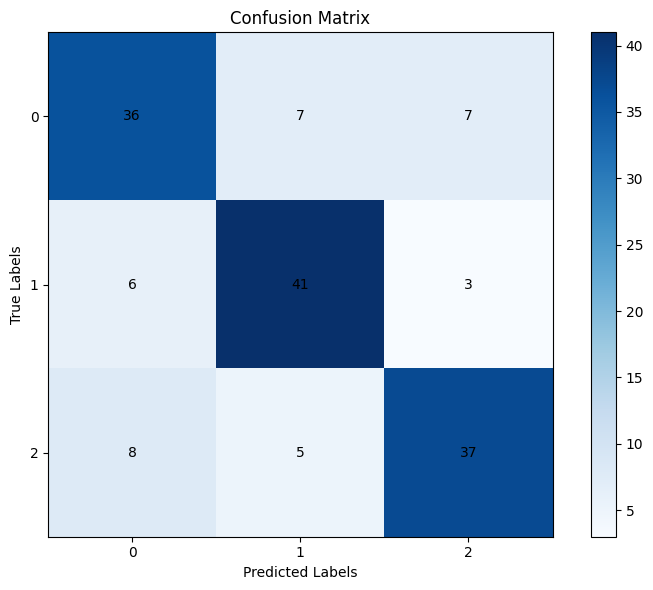

In [ ]:
class_labels = ["0", "1", "2"]

plt.figure(figsize=(8, 6))
plt.imshow(confusion, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()

num_classes = len(class_labels)

tick_marks = np.arange(num_classes)
plt.xticks(tick_marks, class_labels)
plt.yticks(tick_marks, class_labels)

# Display the values in the cells
for i in range(num_classes):
    for j in range(num_classes):
        plt.text(j, i, str(confusion[i, j]), ha='center', va='center', color='black')

plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.linear_model import LogisticRegression
model2 = LogisticRegression(multi_class="multinomial", solver="lbfgs", max_iter=10000).fit(Train_X_std, Y_train)
predictions2 = model2.predict(Test_X_std)
confusion = confusion_matrix(Y_test, predictions2)
print(confusion)

accuracy2 = accuracy_score(Y_test, predictions2)
overall_precision2 = precision_score(Y_test, predictions2, average='weighted')
overall_recall2 = recall_score(Y_test, predictions2, average='weighted')

print(f'Overall Precision: {overall_precision2*100:.2f} %')
print(f'Overall Recall: {overall_recall2*100:.2f} %')
print(f"Accuracy: {accuracy2*100:.2f} %")

[[43  4  3]
 [ 4 40  6]
 [ 6  4 40]]
Overall Precision: 82.03 %
Overall Recall: 82.00 %
Accuracy: 82.00 %


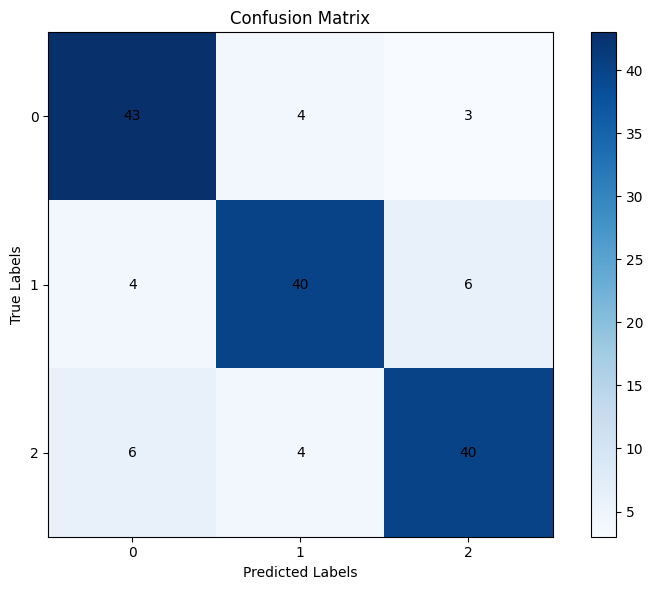

In [ ]:
class_labels = ["0", "1", "2"]

plt.figure(figsize=(8, 6))
plt.imshow(confusion, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()

num_classes = len(class_labels)

tick_marks = np.arange(num_classes)
plt.xticks(tick_marks, class_labels)
plt.yticks(tick_marks, class_labels)

# Display the values in the cells
for i in range(num_classes):
    for j in range(num_classes):
        plt.text(j, i, str(confusion[i, j]), ha='center', va='center', color='black')

plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.tight_layout()
plt.show()

In [ ]:
RF_model = RandomForestClassifier()

param_dist={'bootstrap': [True, False],
            'max_depth': [10, 20, 50, 100, None],
            'max_features': ['auto', 'sqrt'],
            'min_samples_leaf': [1, 2, 4],
            'min_samples_split': [2, 5, 10],
            'n_estimators': [50, 100]}

model3 = RF_model.fit(Train_X_std, Y_train)
predictions3 = model3.predict(Test_X_std)
confusion = confusion_matrix(Y_test, predictions3)
print(confusion)

accuracy3 = accuracy_score(Y_test, predictions3)
overall_precision3 = precision_score(Y_test, predictions3, average='weighted')
overall_recall3 = recall_score(Y_test, predictions3, average='weighted')

print(f'Overall Precision: {overall_precision3*100:.2f} %')
print(f'Overall Recall: {overall_recall3*100:.2f} %')
print(f"Accuracy: {accuracy3*100:.2f} %")

[[46  3  1]
 [ 4 44  2]
 [ 4  1 45]]
Overall Precision: 90.20 %
Overall Recall: 90.00 %
Accuracy: 90.00 %


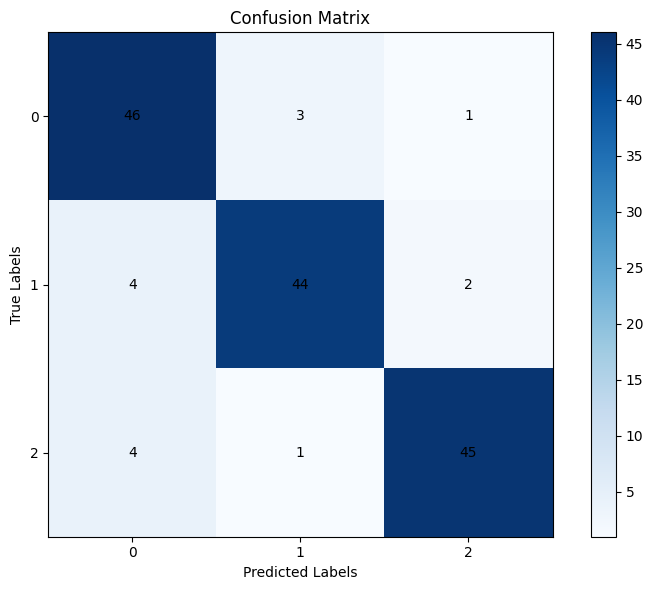

In [ ]:
class_labels = ["0", "1", "2"]

plt.figure(figsize=(8, 6))
plt.imshow(confusion, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()

num_classes = len(class_labels)

tick_marks = np.arange(num_classes)
plt.xticks(tick_marks, class_labels)
plt.yticks(tick_marks, class_labels)

# Display the values in the cells
for i in range(num_classes):
    for j in range(num_classes):
        plt.text(j, i, str(confusion[i, j]), ha='center', va='center', color='black')

plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.tight_layout()
plt.show()

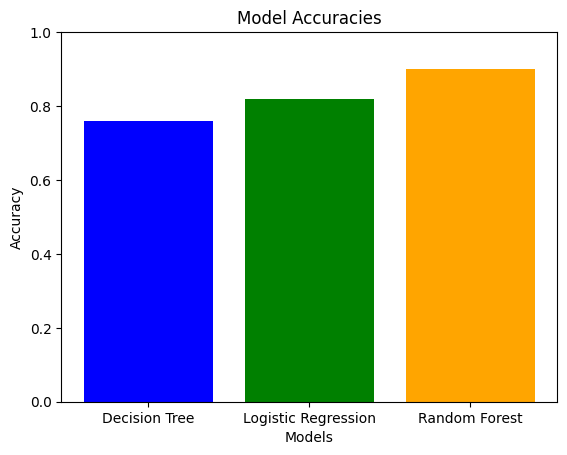

In [ ]:
accuracies = [accuracy, accuracy2, accuracy3]
labels = ['Decision Tree', 'Logistic Regression', 'Random Forest']

plt.bar(labels, accuracies, color=['blue', 'green', 'orange'])
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Accuracies')
plt.ylim(0, 1)
plt.show()